### Setup

In [70]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Patch
import seaborn as sns

In [71]:
# load train_df.parquet
df = pd.read_parquet(
    "../data/initial_dfs/train_df.parquet",
    engine="pyarrow"
)

<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#000000'>
    
# **1. Exploratory Data Analysis (EDA)**</font>
</a>






</div>

In [72]:
# Initialize lists to store categorical and numerical variables
categorical_columns = []
numerical_columns = []

# Turn ziopcode into categorical (string) variable, not numerical.
df["Zip Code"] = df["Zip Code"].astype(str)

# Iterate over columns
for column in df.columns:
    # Check if the column data type is object (categorical)
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    # Check if the column data type is numeric (int or float)
    elif df[column].dtype in ['int64', 'float64']:
        numerical_columns.append(column)


# Print identified categorical and numerical
print(f'Categorical columns: {len(categorical_columns)}')
print(list(categorical_columns))
print(f'Numeric columns: {len(numerical_columns)}')
print(list(numerical_columns))

Categorical columns: 32
['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Quarter', 'Customer Status', 'Churn Label', 'Churn Category', 'Churn Reason']
Numeric columns: 20
['Age', 'Number of Dependents', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV', 'ID', 'Population']


##### 2.1.1 Numeric Variables

In [73]:
# Get the main descriptive statistics for all the numeric variables
df.describe()

,Age,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,ID,Population
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,46.484260,0.465325,36.215234,-119.780115,1.956450,32.728521,23.126611,20.316686,64.610568,2296.052933,2.000720,6.295858,768.798301,3069.146372,3.252308,0.265325,58.809467,4401.130888,784.883077,21974.408994
std,16.800574,0.962996,2.458389,2.149923,2.992098,24.665171,15.411364,20.416568,30.387526,2277.982236,7.896226,23.796457,858.781521,2886.038835,1.212022,0.441559,20.998002,1184.590817,490.049679,21110.478463
min,19.000000,0.000000,32.555828,-124.240051,0.000000,1.000000,0.000000,0.000000,18.700000,18.800000,0.000000,0.000000,0.000000,21.400000,1.000000,0.000000,5.000000,2003.000000,1.000000,11.000000
25%,32.000000,0.000000,33.998471,-121.777179,0.000000,9.000000,9.360000,3.000000,34.650000,413.250000,0.000000,0.000000,76.200000,626.550000,3.000000,0.000000,41.000000,3481.000000,343.000000,2296.000000
50%,46.000000,0.000000,36.292230,-119.672483,0.000000,29.000000,23.240000,17.000000,70.250000,1406.650000,0.000000,0.000000,420.820000,2125.030000,3.000000,0.000000,62.000000,4521.000000,769.000000,17112.000000
75%,60.000000,0.000000,38.192608,-118.005441,3.000000,56.000000,36.490000,27.000000,90.100000,3856.750000,0.000000,0.000000,1218.240000,4854.180000,4.000000,1.000000,76.000000,5381.000000,1212.000000,36057.000000
max,80.000000,9.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8672.450000,49.510000,150.000000,3564.000000,11868.340000,5.000000,1.000000,96.000000,6499.000000,1670.000000,105285.000000


In [74]:
# Gross revenue across all customers
gross_total = df['Total Revenue'].sum()
print(f"Gross revenue: ${gross_total:,.2f}")

# Total charges across all customers
total_charges = df['Total Charges'].sum()
print(f"Total charges: ${total_charges:,.2f}")

# Monthly charge across all customers
monthly_charges = df['Monthly Charge'].sum()
print(f"Monthly charge: ${monthly_charges:,.2f}")

Gross revenue: $12,967,143.42
Total charges: $9,700,823.64
Monthly charge: $272,979.65


In [75]:
# Referral Rate
referral_rate = (df['Number of Referrals'] > 0).mean() * 100
print(f"Referral Rate: {referral_rate:.2f}%")

Referral Rate: 46.25%


In [76]:
df['Churn Value'].value_counts(normalize=True)

Churn Value
0    0.734675
1    0.265325
Name: proportion, dtype: float64

##### 2.1.2 Categorical Variables

In [77]:
# For qualitative features
df.describe(include='O').T

,count,unique,top,freq
Gender,4225,2,Male,2154
Under 30,4225,2,No,3378
Senior Citizen,4225,2,No,3529
Married,4225,2,No,2158
Dependents,4225,2,No,3257
Country,4225,1,United States,4225
State,4225,1,California,4225
City,4225,1084,Los Angeles,173
Zip Code,4225,1581,92027,29
Lat Long,4225,1614,"33.141265, -116.967221",29


In [78]:
# Check the possible values for the categorical variables (YES/NO) - (continue)
print(df['Under 30'].value_counts())
print(df['Senior Citizen'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Referred a Friend'].value_counts())
print(df['Phone Service'].value_counts())
print(df['Multiple Lines'].value_counts())

Under 30
No     3378
Yes     847
Name: count, dtype: int64
Senior Citizen
No     3529
Yes     696
Name: count, dtype: int64
Married
No     2158
Yes    2067
Name: count, dtype: int64
Dependents
No     3257
Yes     968
Name: count, dtype: int64
Referred a Friend
No     2271
Yes    1954
Name: count, dtype: int64
Phone Service
Yes    3825
No      400
Name: count, dtype: int64
Multiple Lines
No     2405
Yes    1820
Name: count, dtype: int64


In [79]:
# (continue) - Check the possible values for the categorical variables (YES/NO) - (continue)
print(df['Internet Service'].value_counts())
print(df['Online Security'].value_counts())
print(df['Online Backup'].value_counts())
print(df['Device Protection Plan'].value_counts())
print(df['Premium Tech Support'].value_counts())
print(df['Streaming TV'].value_counts())
print(df['Streaming Movies'].value_counts())
print(df['Streaming Music'].value_counts())

Internet Service
Yes    3278
No      947
Name: count, dtype: int64
Online Security
No     3032
Yes    1193
Name: count, dtype: int64
Online Backup
No     2775
Yes    1450
Name: count, dtype: int64
Device Protection Plan
No     2778
Yes    1447
Name: count, dtype: int64
Premium Tech Support
No     3003
Yes    1222
Name: count, dtype: int64
Streaming TV
No     2617
Yes    1608
Name: count, dtype: int64
Streaming Movies
No     2560
Yes    1665
Name: count, dtype: int64
Streaming Music
No     2712
Yes    1513
Name: count, dtype: int64


In [80]:
# (continue) - Check the possible values for the categorical variables (YES/NO)
print(df['Streaming Music'].value_counts())
print(df['Unlimited Data'].value_counts())
print(df['Paperless Billing'].value_counts())
print(df['Churn Label'].value_counts()) 

Streaming Music
No     2712
Yes    1513
Name: count, dtype: int64
Unlimited Data
Yes    2836
No     1389
Name: count, dtype: int64
Paperless Billing
Yes    2550
No     1675
Name: count, dtype: int64
Churn Label
No     3104
Yes    1121
Name: count, dtype: int64


In [81]:
print(df['Gender'].value_counts())
print(df['Country'].value_counts())
print(df['State'].value_counts())

Gender
Male      2154
Female    2071
Name: count, dtype: int64
Country
United States    4225
Name: count, dtype: int64
State
California    4225
Name: count, dtype: int64


In [82]:
print(df['City'].value_counts())
print(df['Lat Long'].value_counts())
print(df['Offer'].value_counts())

City
Los Angeles       173
San Diego         169
San Jose           66
San Francisco      62
Sacramento         61
                 ... 
Lathrop             1
Alamo               1
Lucerne Valley      1
Weaverville         1
Blocksburg          1
Name: count, Length: 1084, dtype: int64
Lat Long
33.141265, -116.967221    29
33.362575, -117.299644    26
33.507255, -117.029473    19
32.825086, -117.199424    19
32.886925, -117.152162    17
                          ..
34.659579, -118.584212     1
32.85723, -117.209780      1
32.787836, -117.232374     1
41.831901, -123.487478     1
40.309088, -123.668201     1
Name: count, Length: 1614, dtype: int64
Offer
Offer B    494
Offer E    479
Offer D    361
Offer A    325
Offer C    246
Name: count, dtype: int64


In [83]:
print(df['Internet Type'].value_counts())

Internet Type
Fiber Optic    1819
DSL            1001
Cable           458
Name: count, dtype: int64


In [84]:
print(df['Contract'].value_counts())

Contract
Month-to-Month    2138
Two Year          1152
One Year           935
Name: count, dtype: int64


In [85]:
print(df['Payment Method'].value_counts())

Payment Method
Bank Withdrawal    2336
Credit Card        1659
Mailed Check        230
Name: count, dtype: int64


In [86]:
print(df['Quarter'].value_counts())

Quarter
Q3    4225
Name: count, dtype: int64


In [87]:
print(df['Customer Status'].value_counts())

Customer Status
Stayed     2829
Churned    1121
Joined      275
Name: count, dtype: int64


In [88]:
print(df['Churn Category'].value_counts())

Churn Category
Competitor         498
Dissatisfaction    185
Attitude           185
Price              133
Other              120
Name: count, dtype: int64


In [89]:
print(df['Churn Reason'].value_counts())

Churn Reason
Competitor had better devices                189
Competitor made better offer                 188
Attitude of support person                   130
Don't know                                    82
Competitor offered more data                  64
Competitor offered higher download speeds     57
Attitude of service provider                  55
Price too high                                49
Product dissatisfaction                       48
Long distance charges                         44
Network reliability                           42
Service dissatisfaction                       37
Limited range of services                     26
Moved                                         25
Extra data charges                            23
Lack of self-service on Website               22
Lack of affordable download/upload speed      17
Poor expertise of online support              13
Poor expertise of phone support                6
Deceased                                       4
Name: c

#### __2.2 Kurtosis and Skewness Analysis__

This analysis will include an examination of skewness and kurtosis for the numerical variables in the dataset. These measures will provide deeper insights into the shape of the data distributions:

> - __Skewness:__ will be evaluated to determine the degree of asymmetry in each distribution, indicating whether values are concentrated to the left or right of the mean. Between -0.5 and 0.5 is approx symmetric; 0 indicates a symmetric distribution; between -1 and -0.5 or 0.5 and 1 is moderately skewed. Less than -1 or greater than 1 is highly skewed.<p>

> - __Kurtosis:__  will be assessed to measure the “tailedness” of the distributions, helping to identify the presence of heavy tails or extreme outliers. High kurtosis (>3) indicate a peaked distribution which could indicate the presence of outliers.

In [90]:
# Check the skewness and kurtosis of numerical variables (only)
tab_info1 = pd.DataFrame(df[numerical_columns].skew(), columns=['Skewness'])
print(tab_info1)
tab_info2 = pd.DataFrame(df[numerical_columns].kurtosis(), columns=['Kurtosis'])
print(tab_info2)

                                   Skewness
Age                                0.176391
Number of Dependents               2.152016
Latitude                           0.284320
Longitude                         -0.093094
Number of Referrals                1.444982
Tenure in Months                   0.224289
Avg Monthly Long Distance Charges  0.032455
Avg Monthly GB Download            1.212196
Monthly Charge                    -0.207510
Total Charges                      0.964422
Total Refunds                      4.221422
Total Extra Data Charges           4.274795
Total Long Distance Charges        1.202494
Total Revenue                      0.914526
Satisfaction Score                -0.372299
Churn Value                        1.063441
Churn Score                       -0.180625
CLTV                              -0.313007
ID                                 0.120652
Population                         0.912874
                                    Kurtosis
Age                            

#### __2.3 Visual Exploration__

**Histograms**

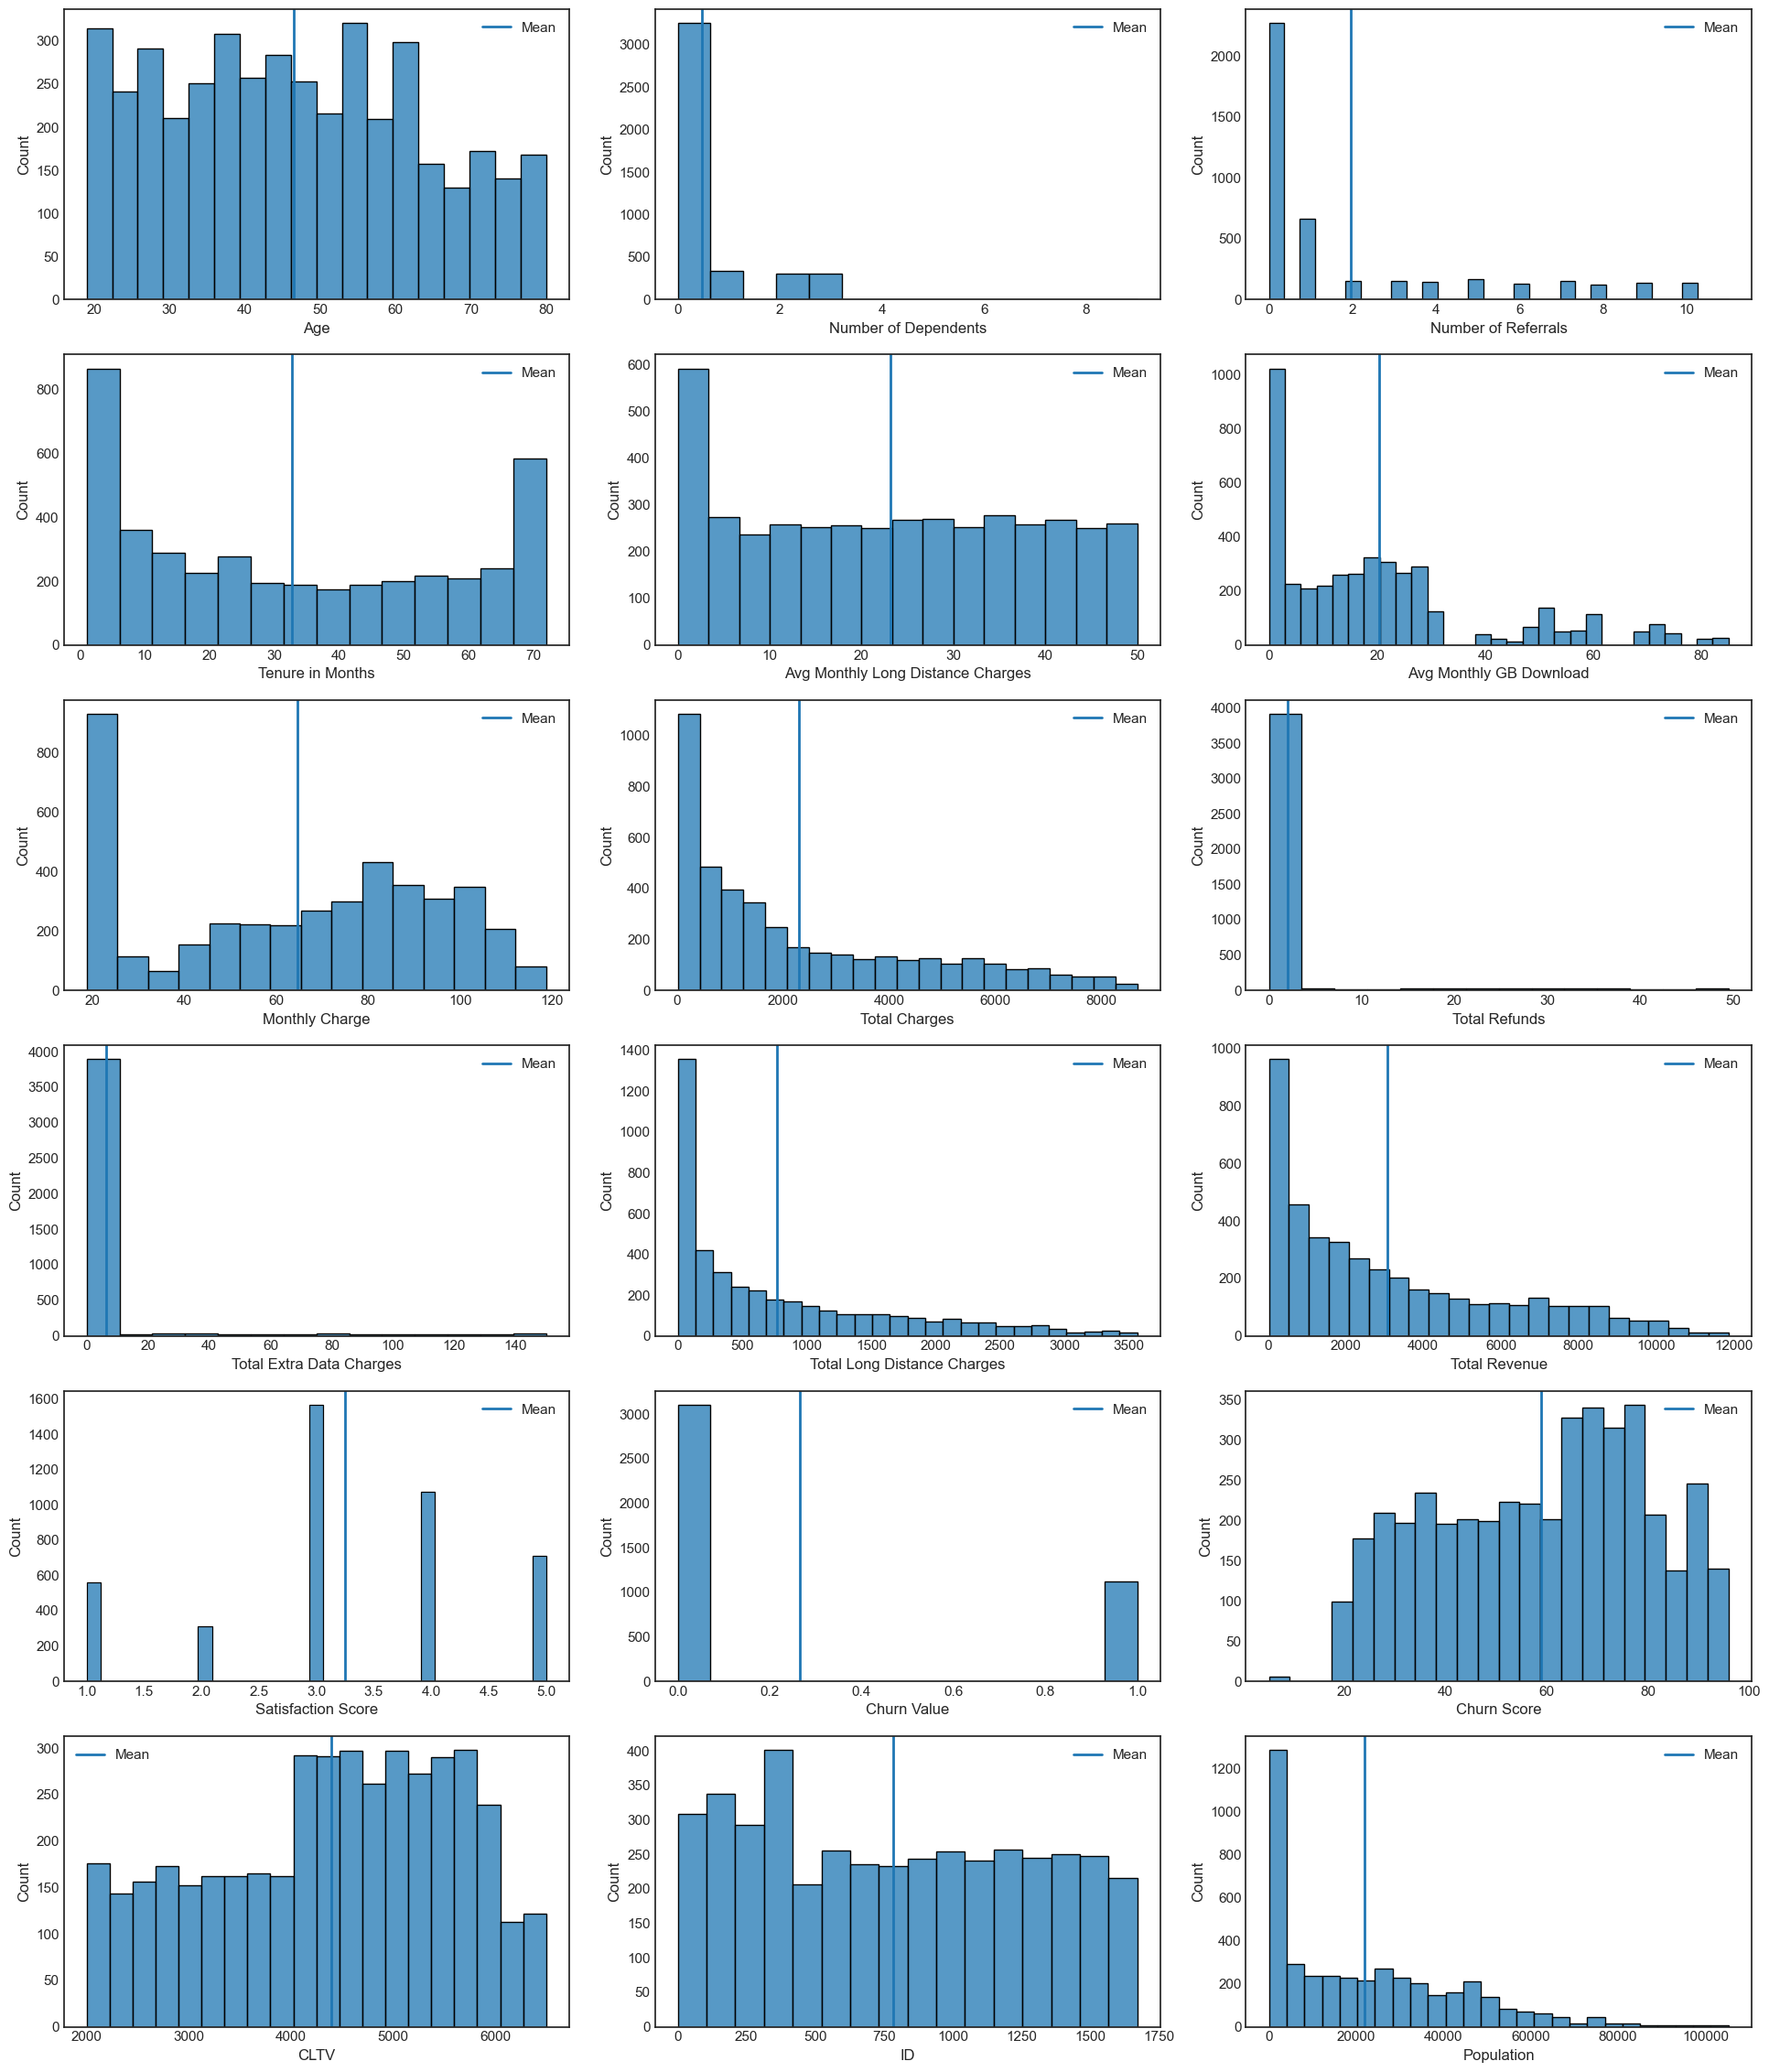

In [91]:
plot_numerical_columns = [
    col for col in numerical_columns 
    if col not in ['Latitude', 'Longitude']
]
# Grid config: 3 columns, rows computed from how many plots you need
n_plots = len(plot_numerical_columns)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5 * n_cols, 3.8 * n_rows))
axs = np.array(axs).reshape(-1)  # flatten safely even if n_rows==1

for i, col in enumerate(plot_numerical_columns):
    ax = axs[i]
    # Plot
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_xlabel(col)

    # Lines: mean and upper whisker (Q3 + 1.5*IQR)
    s = df[col].dropna()
    mean_val = s.mean()
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    upper_whisker = q3 + 1.5 * (q3 - q1)

    ax.axvline(mean_val, linewidth=2, label='Mean')
    ax.legend()

# Turn off any unused subplots
for k in range(n_plots, len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()

**Boxplots**

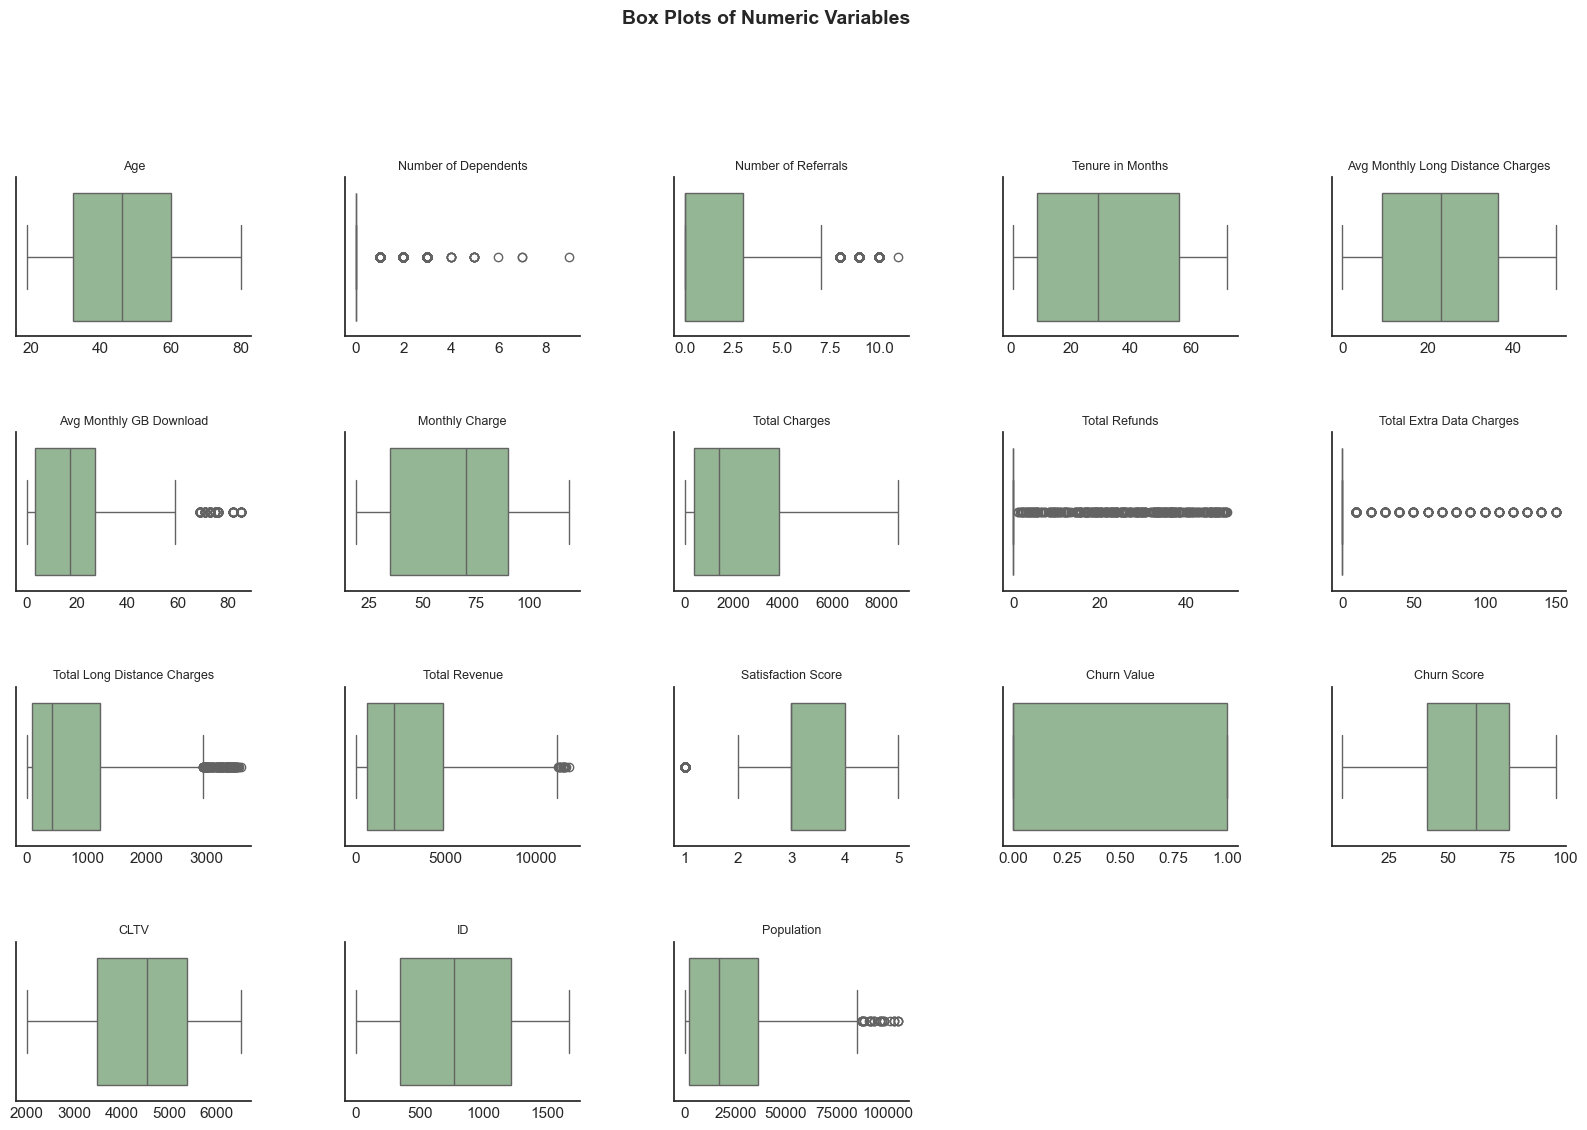

In [92]:
# Dynamically size grid
n_vars = len(plot_numerical_columns)
n_cols = 5
n_rows = math.ceil(n_vars / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = np.array(axes).flatten()  # flatten even if only 1 row

# Plot each boxplot
for i, var in enumerate(plot_numerical_columns):
    sns.boxplot(data=df, x=var, ax=axes[i], color='darkseagreen')
    axes[i].set_title(var, fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Turn off unused subplots
for j in range(n_vars, len(axes)):
    axes[j].axis('off')

# Layout adjustments
sns.despine()
plt.subplots_adjust(hspace=0.6, wspace=0.4)
fig.suptitle('Box Plots of Numeric Variables', fontsize=14, fontweight='bold', y=1.02)
plt.show()

In [93]:
# How many outliers are there for each  numerical variable

# 1) Select numerical columns only
numerical_cols = df.select_dtypes(include=np.number).columns
df_num = df[numerical_cols]

# 2) Compute quartiles and IQR (Interquartile Range)
q1 = df_num.quantile(0.25)  # 25th percentile
q3 = df_num.quantile(0.75)  # 75th percentile
iqr = q3 - q1               # Interquartile range

# 3) Define outlier thresholds using Tukey's rule (1.5 * IQR)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 4) Create boolean masks for values below/above the thresholds (column-wise broadcasting)
below = df_num.lt(lower_bound)   # values < lower_bound
above = df_num.gt(upper_bound)   # values > upper_bound

# 5) Count outliers per column (sum of below + above)
outliers_per_col = below.sum(axis=0) + above.sum(axis=0)

# 6) Keep only columns with at least one outlier and print summary
outliers_count = outliers_per_col[outliers_per_col > 0]

print(f'There are {len(outliers_count)} numerical variables with outliers (1.5*IQR):')
print(outliers_count.sort_values(ascending=False))

There are 9 numerical variables with outliers (1.5*IQR):
Number of Dependents           968
Satisfaction Score             561
Total Extra Data Charges       413
Number of Referrals            400
Total Refunds                  326
Avg Monthly GB Download        217
Total Long Distance Charges    103
Population                      31
Total Revenue                   13
dtype: int64


In [94]:
# per column with outliers, percent of customers that churned
for col in outliers_count.index:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    churned_outliers = df.loc[outlier_mask & (df['Churn Value'] == 1)]
    total_outliers = df.loc[outlier_mask]

    if len(total_outliers) > 0:
        churn_rate = len(churned_outliers) / len(total_outliers) * 100
        print(f'Column: {col} — Churn Rate among Outliers: {churn_rate:.2f}% ({len(churned_outliers)}/{len(total_outliers)})')
    else:
        print(f'Column: {col} — No outliers found.')

Column: Number of Dependents — Churn Rate among Outliers: 7.44% (72/968)
Column: Number of Referrals — Churn Rate among Outliers: 0.50% (2/400)
Column: Avg Monthly GB Download — Churn Rate among Outliers: 25.35% (55/217)
Column: Total Refunds — Churn Rate among Outliers: 23.31% (76/326)
Column: Total Extra Data Charges — Churn Rate among Outliers: 32.69% (135/413)
Column: Total Long Distance Charges — Churn Rate among Outliers: 11.65% (12/103)
Column: Total Revenue — Churn Rate among Outliers: 0.00% (0/13)
Column: Satisfaction Score — Churn Rate among Outliers: 100.00% (561/561)
Column: Population — Churn Rate among Outliers: 19.35% (6/31)


#### __2.4 In-Depth Exploration__

##### 2.4.1  Who Are Our Costumers?

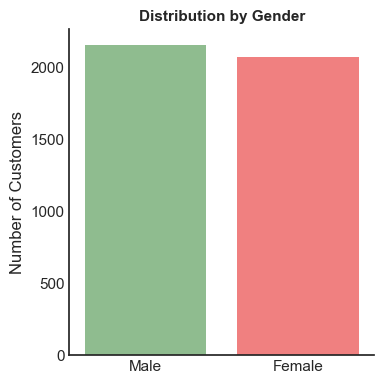

In [95]:
# Distribution by Gender
feature = 'Gender'
title = 'Distribution by Gender'

# Count occurrences
counts = df[feature].value_counts()

# Create bar plot with neutral color
plt.figure(figsize=(4, 4))
ax = sns.barplot(x=counts.index, y=counts.values, color='lightgrey')

# Recolor manually: red for Male, green for Female
for patch, label in zip(ax.patches, counts.index):
    label_str = str(label).strip().lower()
    if label_str == 'male':
        patch.set_facecolor('darkseagreen')       # red for Male
    elif label_str == 'female':
        patch.set_facecolor('lightcoral')   # green for Female

plt.title(title, fontsize=11, fontweight='bold')
plt.ylabel('Number of Customers')
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()

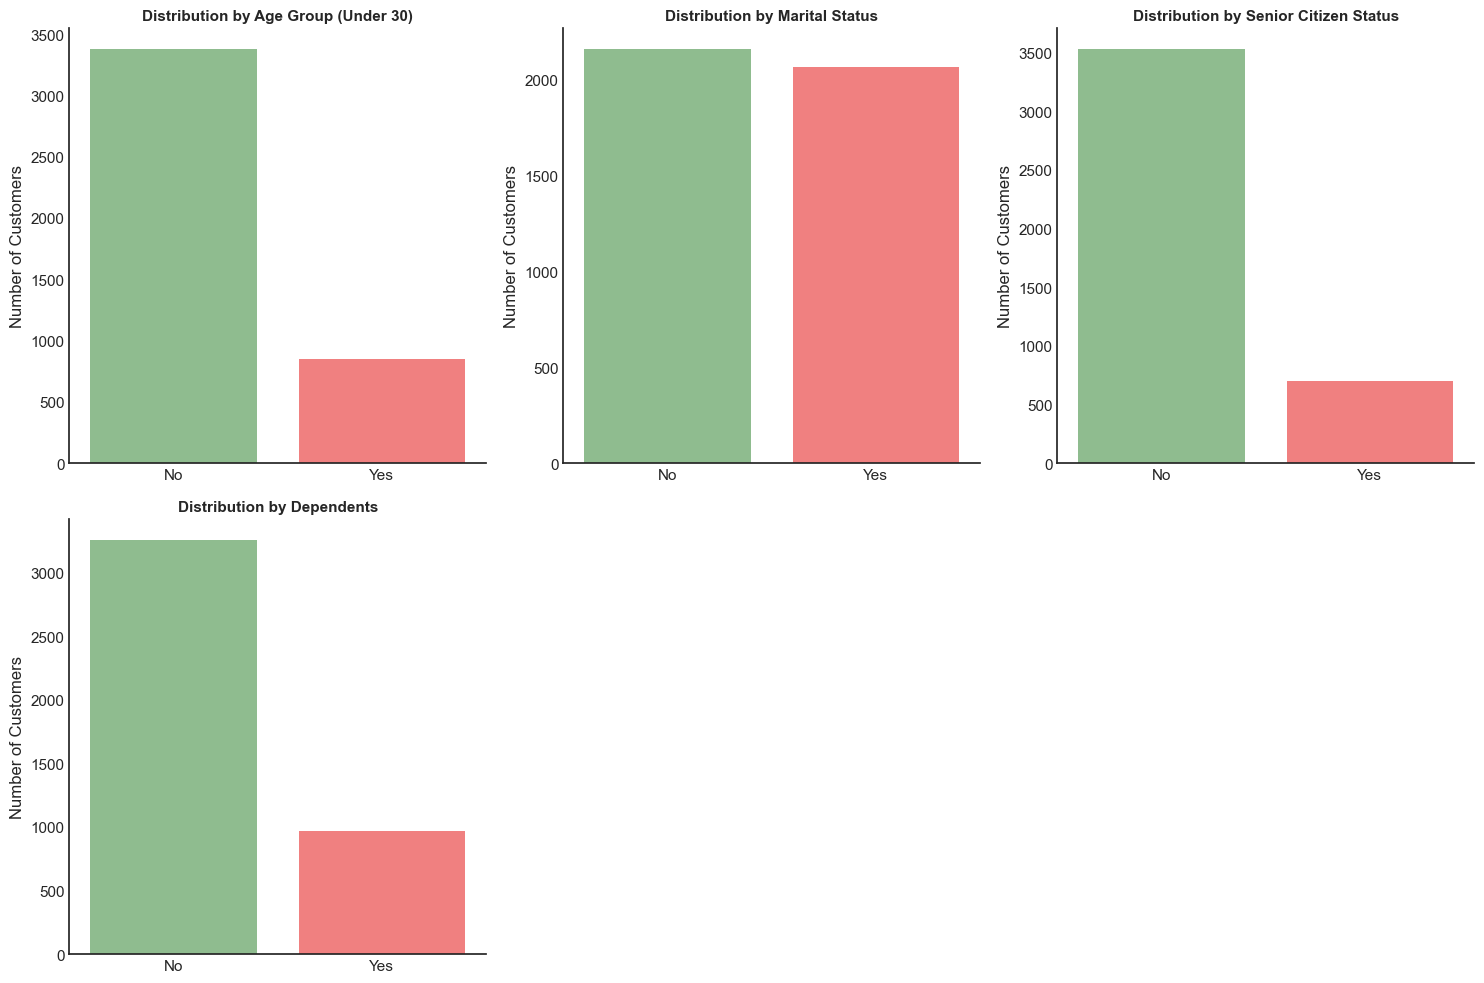

In [96]:
def plot_categorical_grid(df, features, titles=None, ncols=3, figsize_per_row=5, rotate_xticks=0):
    if titles is None:
        titles = features
    assert len(features) == len(titles), 'features and titles must have same length'

    n = len(features)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, figsize_per_row * nrows))
    axes = np.array(axes).reshape(-1)

    for i, (feat, title) in enumerate(zip(features, titles)):
        ax = axes[i]
        if feat not in df.columns:
            ax.text(0.5, 0.5, f"'{feat}' not in df", ha='center', va='center')
            ax.axis('off')
            continue

        # Count the values
        counts = df[feat].value_counts()

        # Plot with neutral color first
        sns.barplot(x=counts.index, y=counts.values, color='darkseagreen', ax=ax)

        # Recolor the bars manually
        for patch, label in zip(ax.patches, counts.index):
            label_str = str(label).strip().lower()
            if label_str == 'no':
                patch.set_facecolor('darkseagreen')
            elif label_str == 'yes':
                patch.set_facecolor('lightcoral')

        # Titles and formatting
        ax.set_title(title, fontsize=11, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Number of Customers')
        if rotate_xticks:
            ax.tick_params(axis='x', labelrotation=rotate_xticks)
        sns.despine(ax=ax)

    # Hide any unused subplots
    for j in range(len(features), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
demographic_features = ['Under 30', 'Married', 'Senior Citizen', 'Dependents']
demographic_titles = [
    'Distribution by Age Group (Under 30)',
    'Distribution by Marital Status',
    'Distribution by Senior Citizen Status',
    'Distribution by Dependents'
]

plot_categorical_grid(
    df,
    features=demographic_features,
    titles=demographic_titles,
    ncols=3,
    rotate_xticks=0
)


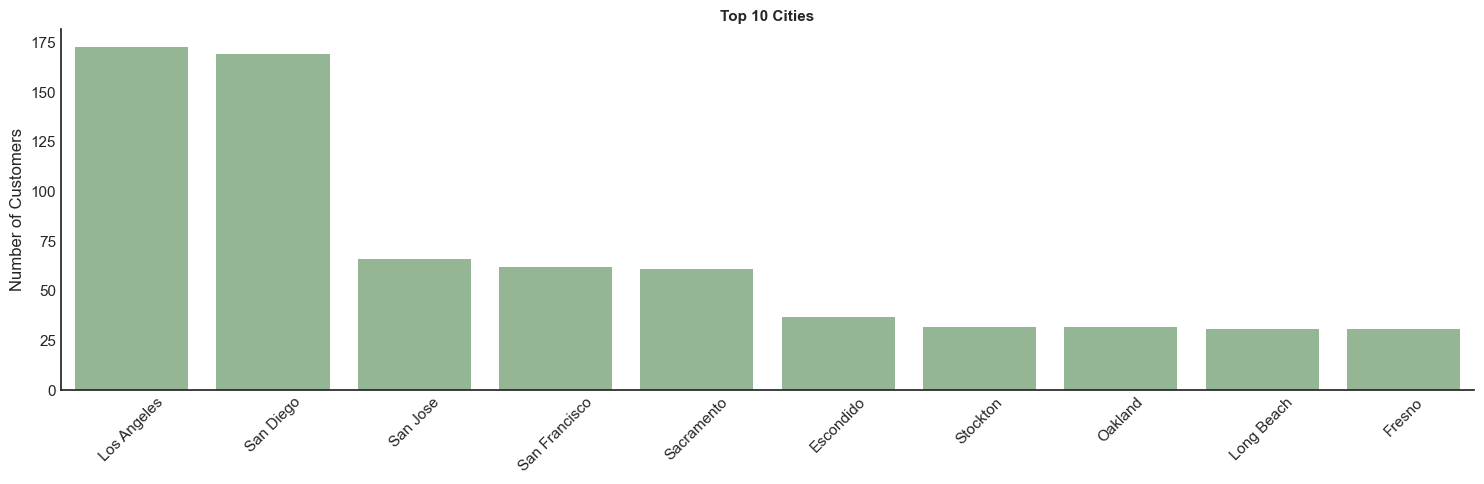

In [97]:
def plot_categorical_grid(df, features, titles=None, ncols=3, figsize_per_row=5, rotate_xticks=0, top_n=None):
    if titles is None:
        titles = features
    assert len(features) == len(titles), "features and titles must have same length"

    n = len(features)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, figsize_per_row * nrows))
    axes = np.array(axes).reshape(-1)

    def norm_label(x):
        s = str(x).strip().lower()
        if s in {"yes", "y", "true", "1"}:
            return "yes"
        if s in {"no", "n", "false", "0"}:
            return "no"
        return s

    for i, (feat, title) in enumerate(zip(features, titles)):
        ax = axes[i]

        if feat not in df.columns:
            ax.text(0.5, 0.5, f"'{feat}' not in df", ha='center', va='center')
            ax.axis('off')
            continue

        counts = df[feat].value_counts()

        # Apply top_n filter (useful for City)
        if top_n:
            counts = counts.head(top_n)

        cats = list(counts.index)
        norm = [norm_label(c) for c in cats]
        is_yes_no = set(norm).issubset({"yes", "no"}) and len(set(norm)) == 2

        # Keep consistent order for Yes/No
        if is_yes_no:
            label_map = {norm_label(c): c for c in cats}
            ordered_labels = [label_map.get("no"), label_map.get("yes")]
            counts = counts.reindex(ordered_labels)
            base_color = "darkseagreen"
        else:
            base_color = "darkseagreen"

        # Draw base bars
        sns.barplot(x=counts.index, y=counts.values, color=base_color, ax=ax)

        # Recolor for Yes/No
        if is_yes_no:
            for patch, label in zip(ax.patches, counts.index):
                if norm_label(label) == "no":
                    patch.set_facecolor("darkseagreen")
                elif norm_label(label) == "yes":
                    patch.set_facecolor("lightcoral")

        ax.set_title(title, fontsize=11, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Number of Customers')
        if rotate_xticks:
            ax.tick_params(axis='x', labelrotation=rotate_xticks)
        sns.despine(ax=ax)

    # Hide empty subplots
    for j in range(len(features), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Top 10 cities
plot_categorical_grid(
    df,
    features=['City'],
    titles=['Top 10 Cities'],
    top_n=10,
    ncols=1,
    rotate_xticks=45
)

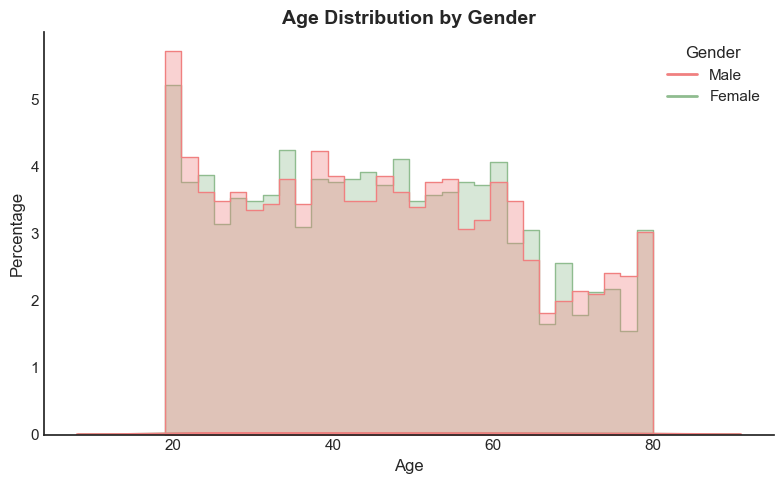

In [98]:
palette = {'Male': 'lightcoral', 'Female': 'darkseagreen'}

plt.figure(figsize=(8,5))
ax = sns.histplot(
    data=df.dropna(subset=['Age','Gender']),
    x='Age',
    hue='Gender',
    bins=30,
    stat='percent',        # show percentages
    common_norm=False,     # normalize within each gender
    element='step',
    fill=True,
    alpha=0.35,
    palette=palette
)
sns.kdeplot(
    data=df.dropna(subset=['Age','Gender']),
    x='Age',
    hue='Gender',
    common_norm=False,
    palette=palette,
    ax=ax,
    lw=2
)

ax.set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
sns.despine()
plt.tight_layout()
plt.show()

#### 2.4.2  Service Offering

__Service Offerings:__ <p>
 Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection Plan, <p>
Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Paperless Billing.

\Service Adoption (service):
               Service  Adoption %    N
         Phone Service       90.53 4225
      Internet Service       77.59 4225
        Unlimited Data       67.12 4225
     Paperless Billing       60.36 4225
        Multiple Lines       43.08 4225
      Streaming Movies       39.41 4225
          Streaming TV       38.06 4225
       Streaming Music       35.81 4225
         Online Backup       34.32 4225
Device Protection Plan       34.25 4225
  Premium Tech Support       28.92 4225
       Online Security       28.24 4225

Distribution for Phone Service:
Phone Service
Yes    90.53
No      9.47
Name: proportion, dtype: float64

Distribution for Multiple Lines:
Multiple Lines
No     56.92
Yes    43.08
Name: proportion, dtype: float64

Distribution for Internet Service:
Internet Service
Yes    77.59
No     22.41
Name: proportion, dtype: float64

Distribution for Online Security:
Online Security
No     71.76
Yes    28.24
Name: proportion, dtype: float64

Distribution f

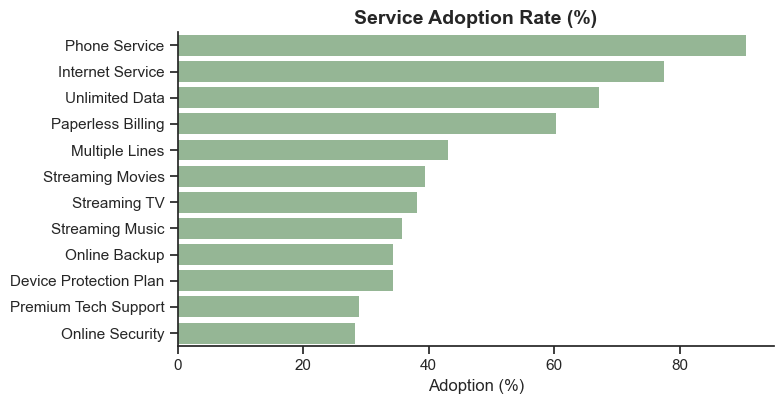

In [99]:
# Service Adoption Rate
# Which services are most/least adopted? (% of customers using each service).

sns.set_context("notebook")

service_offers = [
    'Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup',
    'Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies',
    'Streaming Music','Unlimited Data','Paperless Billing'
]

def yes(x):
    """
    Convert 'Yes'/'No' (and 1/0, True/False, Y/N) to boolean.
    Works for Series or DataFrame; returns same shape with booleans.
    """
    if isinstance(x, pd.Series):
        s = x.astype(str).str.strip().str.lower()
        return s.isin(["yes","y","true","1"])
    elif isinstance(x, pd.DataFrame):
        return x.astype(str).apply(lambda s: s.str.strip().str.lower().isin(["yes","y","true","1"]))
    else:
        raise TypeError("yes() expects a pandas Series or DataFrame")


service_adoption = (
    pd.DataFrame({
        'Service': service_offers,
        'Adoption %': [yes(df[c]).mean()*100 for c in service_offers],
        'N': [df[c].notna().sum() for c in service_offers]
    })
    .sort_values('Adoption %', ascending=False)
    .reset_index(drop=True)
)
print("\Service Adoption (service):")
print(service_adoption.round(2).to_string(index=False))

for c in service_offers:
    print(f"\nDistribution for {c}:")
    print(df[c].value_counts(normalize=True, dropna=False).mul(100).round(2))

# Plot of service_adoption
plt.figure(figsize=(8, max(3, 0.35*len(service_adoption))))
sns.barplot(data=service_adoption, y='Service', x='Adoption %', color='darkseagreen')
plt.title('Service Adoption Rate (%)', fontsize=14, fontweight='bold')
plt.xlabel('Adoption (%)'); plt.ylabel('')
sns.despine(); plt.tight_layout(); plt.show()


ARPU impact by service:
                        ARPU Yes  ARPU No  ARPU Uplift (Yes - No)
Internet Service           77.17    21.12                   56.05
Streaming TV               89.29    49.45                   39.85
Streaming Movies           88.45    49.11                   39.34
Unlimited Data             77.28    38.75                   38.52
Streaming Music            86.56    52.37                   34.19
Device Protection Plan     85.43    53.76                   31.67
Multiple Lines             81.87    51.55                   30.32
Online Backup              83.24    54.88                   28.36
Phone Service              66.96    42.11                   24.85
Premium Tech Support       80.83    58.01                   22.83
Paperless Billing          73.43    51.19                   22.24
Online Security            79.30    58.83                   20.47


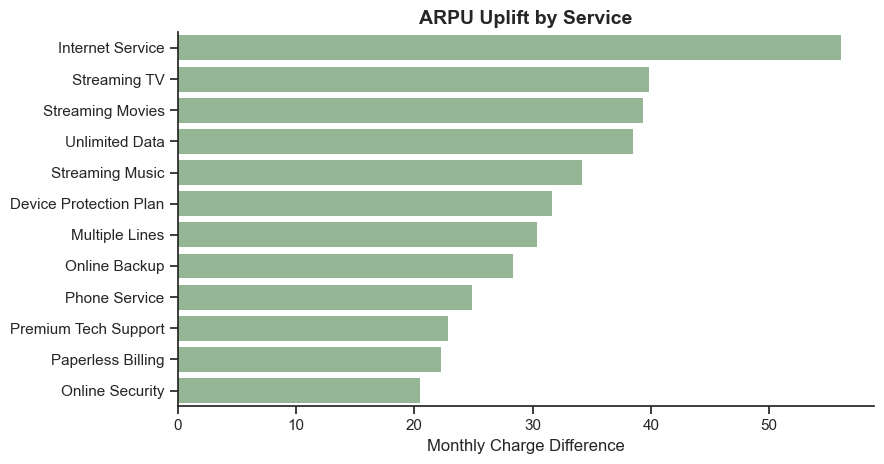

In [100]:
# ARPU (Average Revenue Per User): for each service, the difference in average Monthly Charge between customers who have the service (Yes) 
# and those who don’t (No).

def arpu_yes_no(col):
    mask = yes(df[col])
    arpu = df.groupby(mask)['Monthly Charge'].mean().rename({False:'No', True:'Yes'})
    uplift = arpu.get('Yes', np.nan) - arpu.get('No', np.nan)
    return pd.Series({'ARPU Yes': arpu.get('Yes', np.nan),
                      'ARPU No':  arpu.get('No',  np.nan),
                      'ARPU Uplift (Yes - No)': uplift})

arpu_summary = pd.concat([arpu_yes_no(c) for c in service_offers], axis=1).T
arpu_summary.index = service_offers
arpu_summary = arpu_summary.sort_values('ARPU Uplift (Yes - No)', ascending=False)
print("\nARPU impact by service:")
print(arpu_summary.round(2).to_string())

# ARPU uplift
plt.figure(figsize=(9, max(3, 0.4*len(arpu_summary))))
sns.barplot(data=arpu_summary.reset_index().rename(columns={'index':'Feature'}),
            y='Feature', x='ARPU Uplift (Yes - No)', color='darkseagreen')
plt.title('ARPU Uplift by Service', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charge Difference'); plt.ylabel('')
sns.despine(); plt.tight_layout(); plt.show()

In [101]:
# Overall churn rate
overall_churn_rate = df['Churn Value'].mean() * 100
print(f"Overall churn rate: {overall_churn_rate:.2f}%")

# Churn rate by tenure month: among customers who ever reached that tenure, what % churn at that month
# (pragmatic proxy: share of churners by their Tenure in Months)
churners = df[df['Churn Value'] == 1]
tenure_churn_count = churners['Tenure in Months'].value_counts().sort_index()
tenure_total_count = df['Tenure in Months'].value_counts().sort_index()

tenure_churn_rate = (tenure_churn_count / tenure_total_count * 100).rename('Churn Rate %').fillna(0)

# Estimated loss at churn age (sum of monthly charges for churners at that tenure)
tenure_loss = (churners.groupby('Tenure in Months')['Monthly Charge']
               .sum()
               .rename('Revenue Lost'))

tenure_summary = pd.concat([tenure_churn_rate, tenure_loss], axis=1).fillna(0)
print(tenure_summary.head(20))  # first 20 tenure months

Overall churn rate: 26.53%
                  Churn Rate %  Revenue Lost
Tenure in Months                            
1                    60.377358      12495.80
2                    49.230769       4070.80
3                    45.132743       3292.55
4                    47.706422       3775.30
5                    44.594595       2598.05
6                    38.571429       2068.65
7                    43.209877       2717.40
8                    34.177215       2103.75
9                    35.593220       1453.05
10                   40.740741       2695.00
11                   30.000000       1360.40
12                   36.486486       2167.70
13                   31.034483       1443.05
14                   32.500000       1063.15
15                   37.288136       1528.95
16                   36.206897       1590.70
17                   32.075472       1331.55
18                   29.824561       1315.00
19                   33.333333        935.65
20                   29.5454

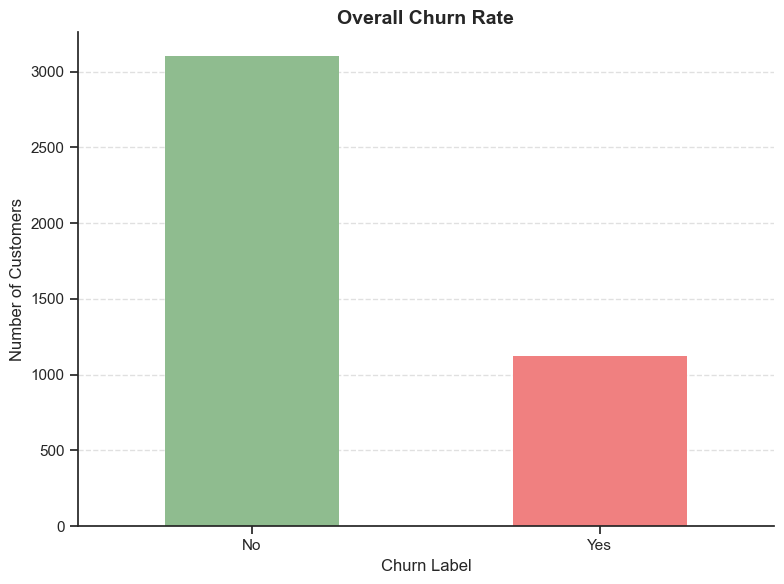

Churn Label
No     3104
Yes    1121
Name: count, dtype: int64
Churn rate: 26.53%


In [102]:
# Count churn labels
churn_counts = df['Churn Label'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['darkseagreen', 'lightcoral'])
plt.title('Overall Churn Rate', fontsize=14, fontweight='bold')
plt.xlabel('Churn Label')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

# Print 
print(churn_counts)

# Overall churn rate in %
churn_rate_pct = df['Churn Label'].eq('Yes').mean() * 100   
print(f"Churn rate: {churn_rate_pct:.2f}%")

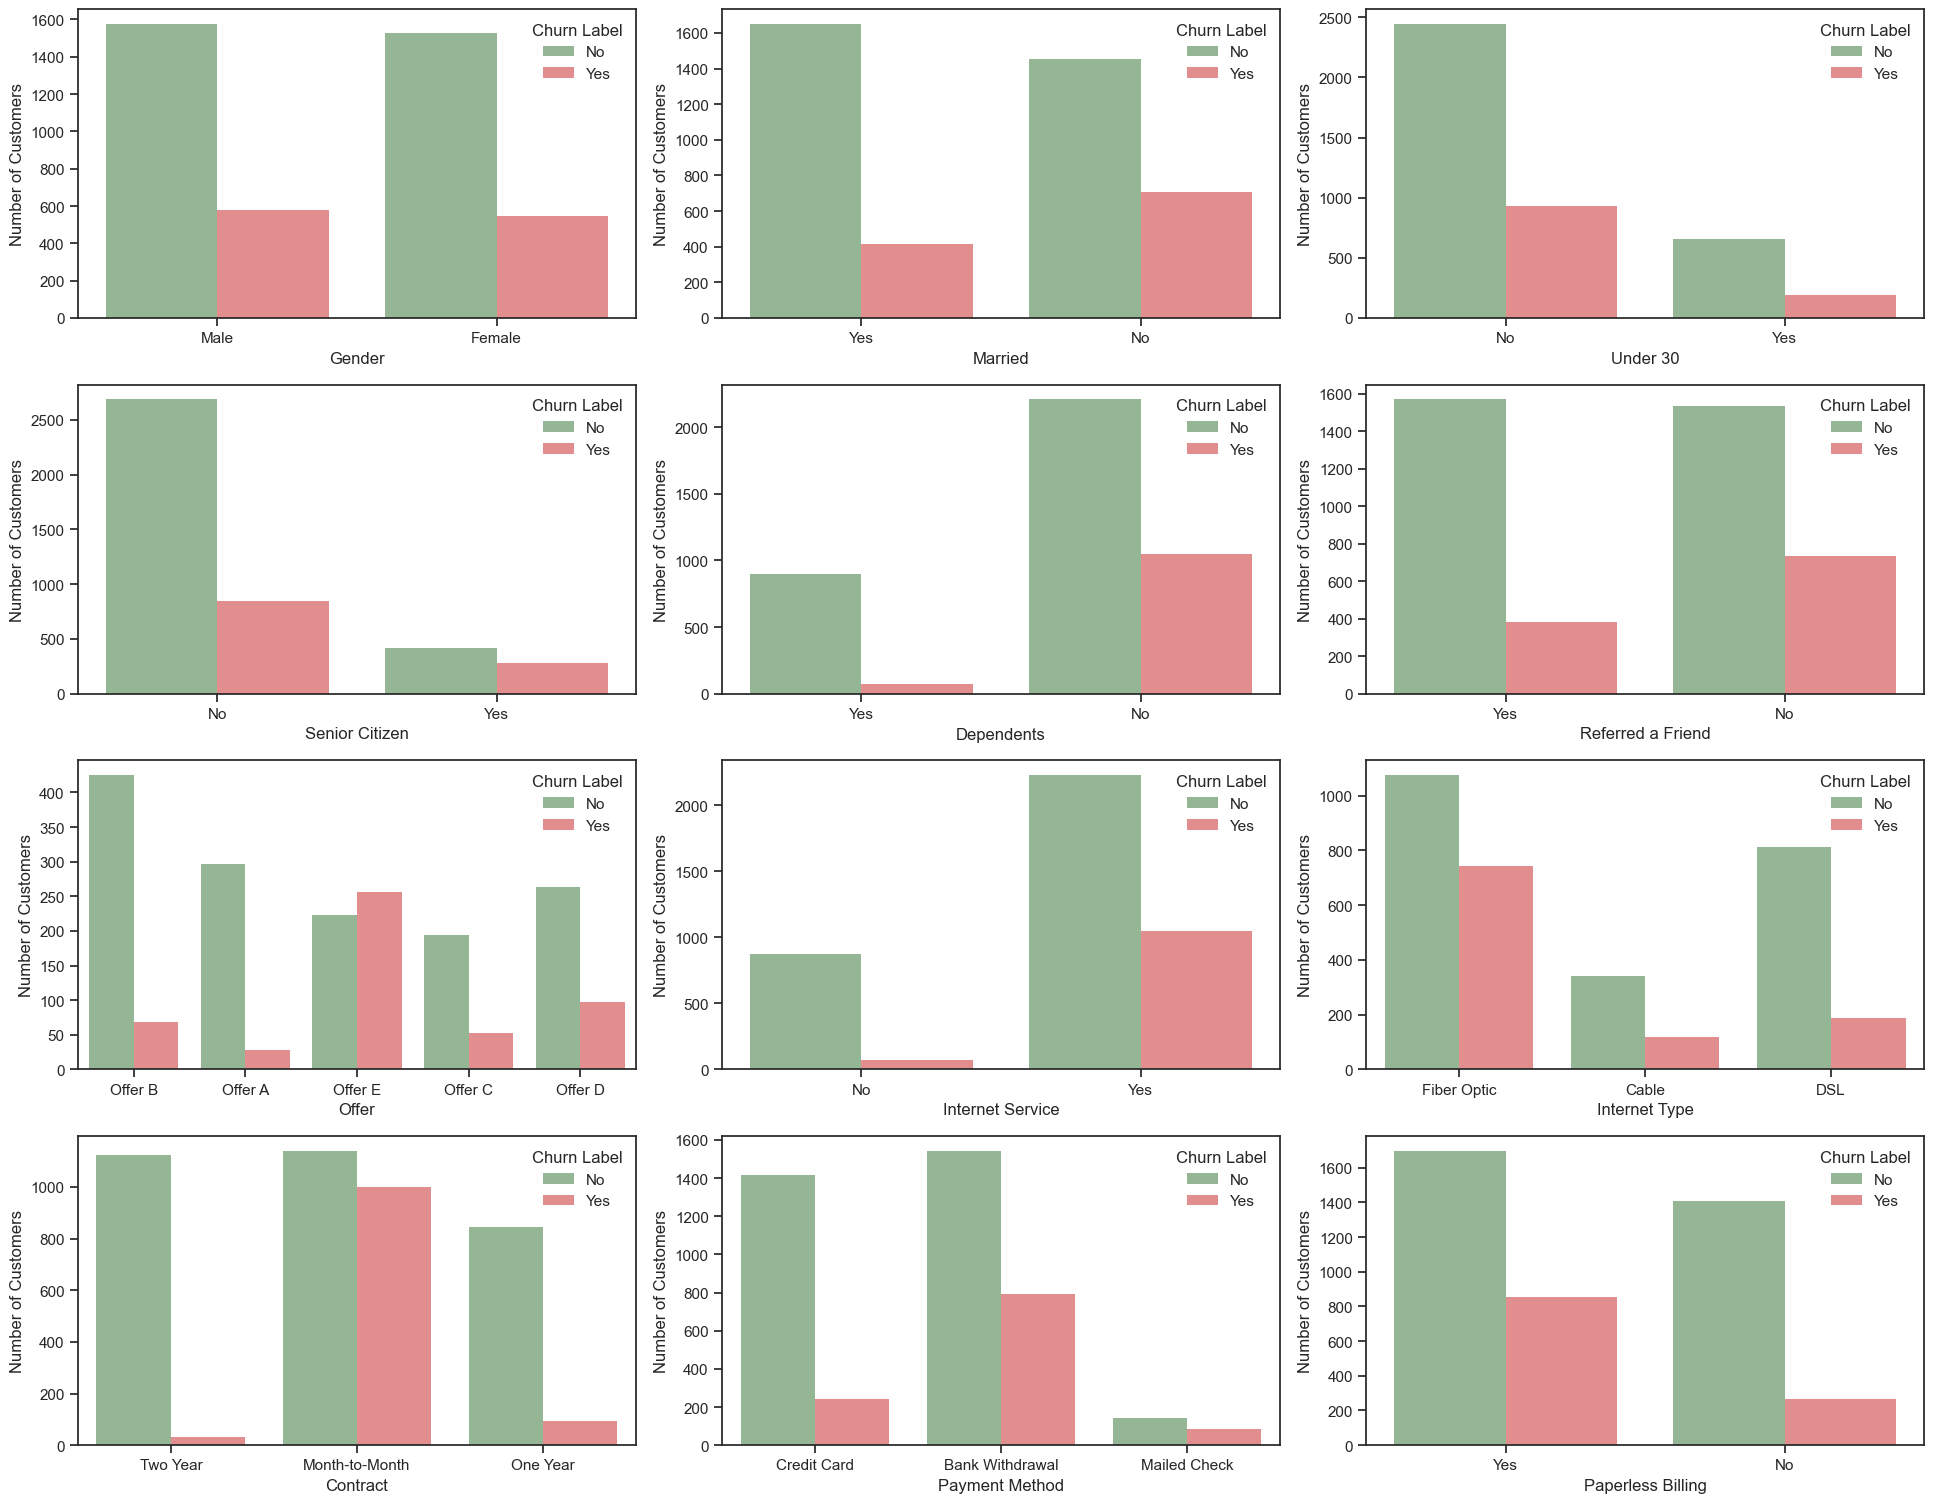

In [103]:
# build several subplots show the distribution of churn by categorical variables
categorical_vars = [
    'Gender', 'Married', 'Under 30','Senior Citizen', 'Dependents','Referred a Friend',
    'Offer','Internet Service','Internet Type','Contract','Payment Method','Paperless Billing'
]

# plot histogram of 'Churn Value' for each categorical variable in categorical_vars
n_vars = len(categorical_vars)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5 * n_cols, 3.8 * n_rows))
axs = np.array(axs).reshape(-1)  # flatten safely even if n_rows==1
for i, col in enumerate(categorical_vars):
    ax = axs[i]
    # Plot
    sns.countplot(data=df, x=col, hue='Churn Label', ax=ax, palette={'No':'darkseagreen', 'Yes':'lightcoral'})
    ax.set_xlabel(col)
    ax.set_ylabel('Number of Customers')
    ax.legend(title='Churn Label')
# Turn off any unused subplots
for k in range(n_vars, len(axs)):
    axs[k].axis('off')
plt.tight_layout()
plt.show()


Bundle/Additional Services summary:
                     Churn_Rate_pct   ARPU     N
Additional Services                             
0                             19.68  31.38  1306
1                             42.19  62.69   493
2                             37.75  69.73   506
3                             31.57  77.67   548
4                             31.46  84.99   515
5                             21.03  90.47   409
6                             12.67  92.53   292
7                              4.49  99.03   156


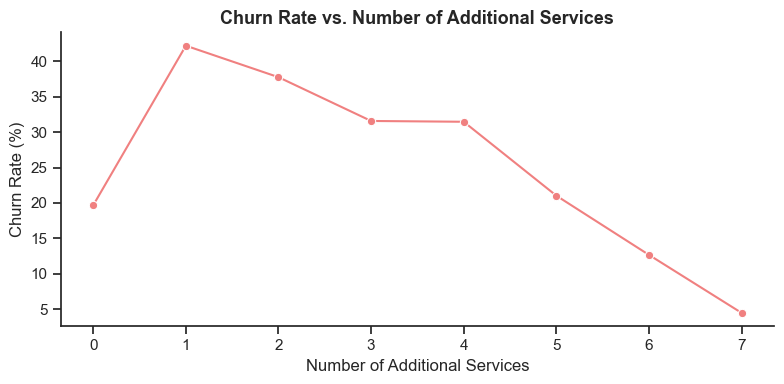

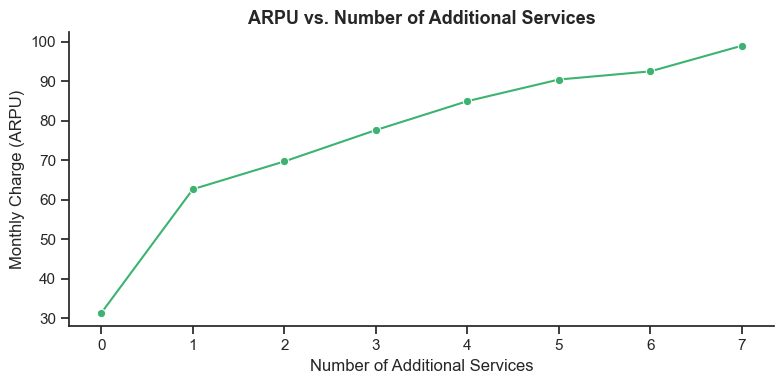

In [104]:
# Add-on Services (Additional Services)
additional_services_cfg = [
    'Online Security','Online Backup','Device Protection Plan',
    'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music'
]
additional_services = [c for c in additional_services_cfg if c in df.columns]  # filter to existing cols

# Helper from earlier (works for Series or DataFrame)
def yes(x):
    if isinstance(x, pd.Series):
        s = x.astype(str).str.strip().str.lower()
        return s.isin(["yes","y","true","1"])
    elif isinstance(x, pd.DataFrame):
        return x.astype(str).apply(lambda s: s.str.strip().str.lower().isin(["yes","y","true","1"]))
    else:
        raise TypeError("yes() expects a pandas Series or DataFrame")

# 3) BUNDLES / ENGAGEMENT INDEX
if additional_services:
    # number of add-ons each customer has
    df['Additional Services'] = yes(df[additional_services]).sum(axis=1).astype('int16')

# number of add-on services a customer has


    bundle_summary = (
        df.groupby('Additional Services', as_index=True)
          .agg(
              Churn_Rate_pct=('Churn Value', 'mean'),
              ARPU=('Monthly Charge', 'mean'),
              N=('Additional Services', 'size')
          )
          .assign(Churn_Rate_pct=lambda x: x['Churn_Rate_pct']*100)
          .sort_index()
    )

    print("\nBundle/Additional Services summary:")
    print(bundle_summary.round(2).to_string())

    # Plots
    plt.figure(figsize=(8,4))
    sns.lineplot(x=bundle_summary.index, y=bundle_summary['Churn_Rate_pct'],
                 marker='o', color='lightcoral')
    plt.title('Churn Rate vs. Number of Additional Services', fontsize=13, fontweight='bold')
    plt.xlabel('Number of Additional Services'); plt.ylabel('Churn Rate (%)')
    sns.despine(); plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,4))
    sns.lineplot(x=bundle_summary.index, y=bundle_summary['ARPU'],
                 marker='o', color='mediumseagreen')
    plt.title('ARPU vs. Number of Additional Services', fontsize=13, fontweight='bold')
    plt.xlabel('Number of Additional Services'); plt.ylabel('Monthly Charge (ARPU)')
    sns.despine(); plt.tight_layout(); plt.show()
else:
    print("[Info] No add-on service columns found to build an Engagement Count.")


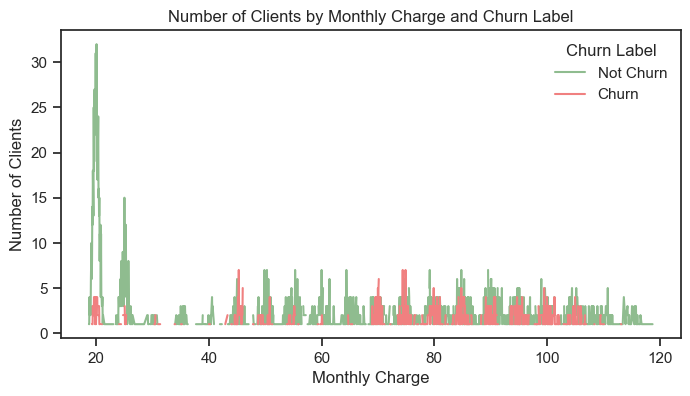

In [105]:
# Group by Monthly Charge and count the number of clients for each Churn Label
line_data = df.groupby(['Monthly Charge', 'Churn Label']).size().unstack()

# Plot the line graph with custom colors
line_data.plot(kind='line', figsize=(8, 4), color=['darkseagreen','lightcoral'])

# Set labels and title
plt.xlabel('Monthly Charge')
plt.ylabel('Number of Clients')
plt.title('Number of Clients by Monthly Charge and Churn Label')

# Customize legend labels and colors
legend_labels = ['Not Churn', 'Churn']
plt.legend(legend_labels, title='Churn Label', loc='upper right')

# Show the plot
plt.show()

<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#000000'>
    
# **2. Segmentation**</font>
</a>






</div>

In [106]:
# # Explore 'churn rate' for different Age bins
df["AgeGroup"] = pd.cut(df["Age"], bins=[0,35,54,59,64,69,74,80])

churn_by_group = (
    df.groupby("AgeGroup")["Churn Value"].mean().reset_index() 
)
churn_by_group

C:\Users\pedro\AppData\Local\Temp\ipykernel_24504\317897997.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Churn Value"].mean().reset_index()


,AgeGroup,Churn Value
0,"(0, 35]",0.231474
1,"(35, 54]",0.247471
2,"(54, 59]",0.224044
3,"(59, 64]",0.242588
4,"(64, 69]",0.384259
5,"(69, 74]",0.393665
6,"(74, 80]",0.420849


In [107]:
# Explore 'churn rate' for customers with dependents and no dependents
churn_by_dependents = (
    df.groupby("Dependents")["Churn Value"].mean().reset_index()
)
churn_by_dependents

,Dependents,Churn Value
0,No,0.322076
1,Yes,0.074380


It is clear that 'AgeGroup' and 'Dependents' are relevant variables from the perspective of defining our customer segments. Let's now mark them as customer segments and visualize their behaviours in respect to churn value and average revenue to confirm that this segmentation makes business sense.

In [108]:
# 1) Create AgeGroup with the new bins
bins   = [0, 35, 50, 65, 81]
labels = ["0-34", "35-49", "50-64", "65-80"]

df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=bins,
    labels=labels,
    include_lowest=True,   
    right=False            # [0,35), [35,50), ...
)

# 2) Make Dependents a cleaner label
df["DepFlag"] = df["Dependents"].map({"Yes": "Dep", "No": "NoDep"})

# 3) Create the segment column: 5 age groups × 2 dep flags = 10 segments
df["segment"] = df["AgeGroup"].astype(str) + "_" + df["DepFlag"]

# 4) Override with "New Cust" segment when Tenure in Months <= 6
mask_new = df["Tenure in Months"] <= 6
df.loc[mask_new, "segment"] = "New Customer"

# 5) Quick check
df["segment"].value_counts()

segment
New Customer    867
35-49_NoDep     675
0-34_NoDep      647
50-64_NoDep     638
65-80_NoDep     539
0-34_Dep        295
35-49_Dep       272
50-64_Dep       251
65-80_Dep        41
Name: count, dtype: int64

In [109]:
# Create 'yearly_revenue' column
df['yearly_revenue']=df['Total Revenue']/df['Tenure in Months']*12

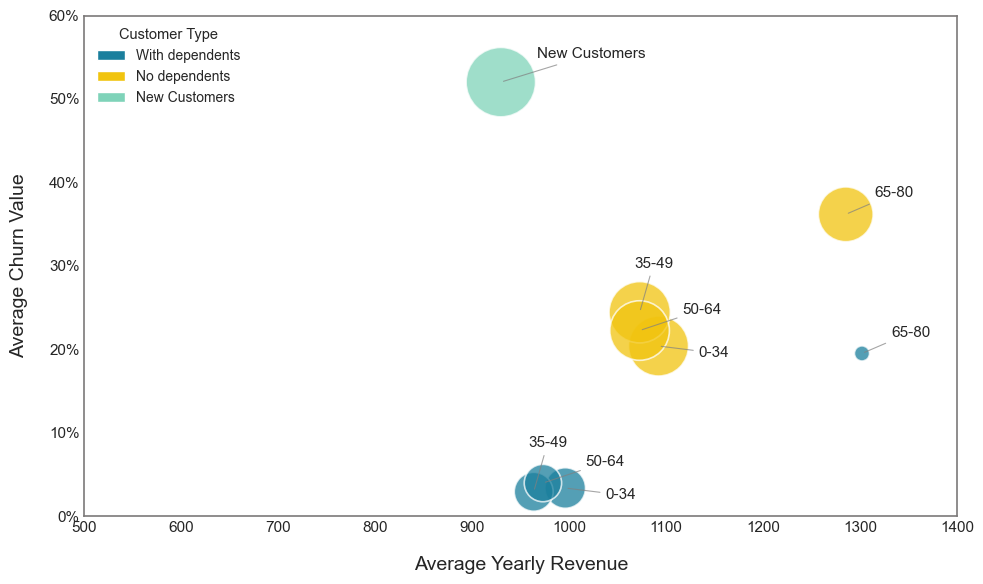

In [110]:
# --- 1. Aggregate stats per segment ---
seg_stats = (
    df
    .groupby("segment")
    .agg(
        avg_yearly_revenue=("yearly_revenue", "mean"),
        avg_churn_value=("Churn Value", "mean"),
        count=("segment", "size")
    )
    .reset_index()
)

# Dependents flag
seg_stats["DependentsFlag"] = (
    seg_stats["segment"]
    .str.extract(r'_(Dep|NoDep)$')[0]
    .map({"Dep": "With dependents", "NoDep": "No dependents"})
)

# --- Flag New Customers ---
seg_stats["IsNew"] = seg_stats["segment"].eq("New Customer")

# --- Label to display next to each bubble ---
def make_label(row):
    if row["IsNew"]:
        return "New Customers"
    return row["segment"].split("_")[0]

seg_stats["label"] = seg_stats.apply(make_label, axis=1)

# --- 2. Bubble size proportional to segment size ---
max_bubble_area = 2500
seg_stats["bubble_size"] = (
    seg_stats["count"] / seg_stats["count"].max()
) * max_bubble_area

# --- 3. Colors ---
color_map = {
    "With dependents": "#1b7f9d",   
    "No dependents":   "#f1c40f",  
    "New Customers":   "#7fd3b9",   
}

def assign_color(row):
    if row["IsNew"]:
        return color_map["New Customers"]
    return color_map[row["DependentsFlag"]]

colors = seg_stats.apply(assign_color, axis=1)

# --- 4. Plot formating ---
plt.style.use("seaborn-v0_8-white")
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    seg_stats["avg_yearly_revenue"],
    seg_stats["avg_churn_value"],
    s=seg_stats["bubble_size"],
    c=colors,
    alpha=0.75,
    edgecolor="white",
    linewidth=1.2
)

# --- 5. Labels for each bubble ---
label_offsets = {
    "New Customers": (65, 15),
    "0-34": (40, -10),
    "35-49": (10, 30),
    "50-64": (45, 10),
    "65-80": (35, 10)
}

for _, row in seg_stats.iterrows():
    dx, dy = label_offsets.get(row["label"], (0, 10))

    ax.annotate(
        row["label"],
        xy=(row["avg_yearly_revenue"], row["avg_churn_value"]),
        xytext=(dx, dy),
        textcoords="offset points",
        fontsize=11,
        ha="center",
        va="bottom",
                arrowprops=dict(
            arrowstyle="-",    
            color="gray",
            lw=0.8,
            alpha=0.7
        )
    )

# --- 6. Axes formatting ---
ax.set_xlabel("Average Yearly Revenue", fontsize=14, labelpad=15)
ax.set_ylabel("Average Churn Value", fontsize=14, labelpad=15)
ax.set_xlim(500,1400)
ax.set_ylim(0,0.6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.tick_params(axis="both", labelsize=11)
for spine in ax.spines.values():
    spine.set_color("#7c7979")
    spine.set_linewidth(1.2)

# --- 7. Legend for bubble colors (Dependents + New Cust) ---
legend_handles = [
    Patch(facecolor=color_map["With dependents"], edgecolor="white", label="With dependents"),
    Patch(facecolor=color_map["No dependents"], edgecolor="white", label="No dependents"),
    Patch(facecolor=color_map["New Customers"], edgecolor="white", label="New Customers"),
]

ax.legend(
    handles=legend_handles,
    title="Customer Type",
    fontsize=10,
    title_fontsize=10.5,
    loc="upper left"
)

plt.tight_layout()
plt.show()

In [111]:
# ADJUST TO MORE MACRO-SEGMENTS GIVEN THEIR CHURN AND REVENUE BEHAVIOR

# 1) Create AgeGroup with the new bins
bins   = [0, 65, 81]
labels = ["0-64", "65-80"]

df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=bins,
    labels=labels,
    include_lowest=True,   
    right=False            # [0,35), [35,50), ...
)

# 2) Make Dependents a cleaner label
df["DepFlag"] = df["Dependents"].map({"Yes": "Dep", "No": "NoDep"})

# 3) Create the segment column: 5 age groups × 2 dep flags = 10 segments
df["segment"] = df["AgeGroup"].astype(str) + "_" + df["DepFlag"]

# 4) Override with "New Cust" segment when Tenure in Months <= 6
mask_new = df["Tenure in Months"] <= 6
df.loc[mask_new, "segment"] = "New Customer"

# 5) Create table with number of counts per segment and average churn rate and yearly revenue
segment_summary = (
    df
    .groupby("segment")
    .agg(
        count=("segment", "size"),
        avg_churn_value=("Churn Value", "mean"),
        avg_yearly_revenue=("yearly_revenue", "mean")
    )
    .reset_index()
)
segment_summary

,segment,count,avg_churn_value,avg_yearly_revenue
0,0-64_Dep,818,0.034230,978.045309
1,0-64_NoDep,1960,0.223980,1079.101277
2,65-80_Dep,41,0.195122,1302.002718
3,65-80_NoDep,539,0.361781,1285.246010
4,New Customer,867,0.520185,929.494240


In [112]:
# merge 65_80_Dep and 65_80_NoDep into '+65y' and update 'segment' column in df accordingly
mask_senior = df["segment"].isin(["65-80_Dep", "65-80_NoDep"])
df.loc[mask_senior, "segment"] = "+65y"
segment_summary = (
    df
    .groupby("segment")
    .agg(
        count=("segment", "size"),
        avg_churn_value=("Churn Value", "mean"),
        avg_yearly_revenue=("yearly_revenue", "mean")
    )
    .reset_index()
)
segment_summary

,segment,count,avg_churn_value,avg_yearly_revenue
0,+65y,580,0.350000,1286.430536
1,0-64_Dep,818,0.034230,978.045309
2,0-64_NoDep,1960,0.223980,1079.101277
3,New Customer,867,0.520185,929.494240


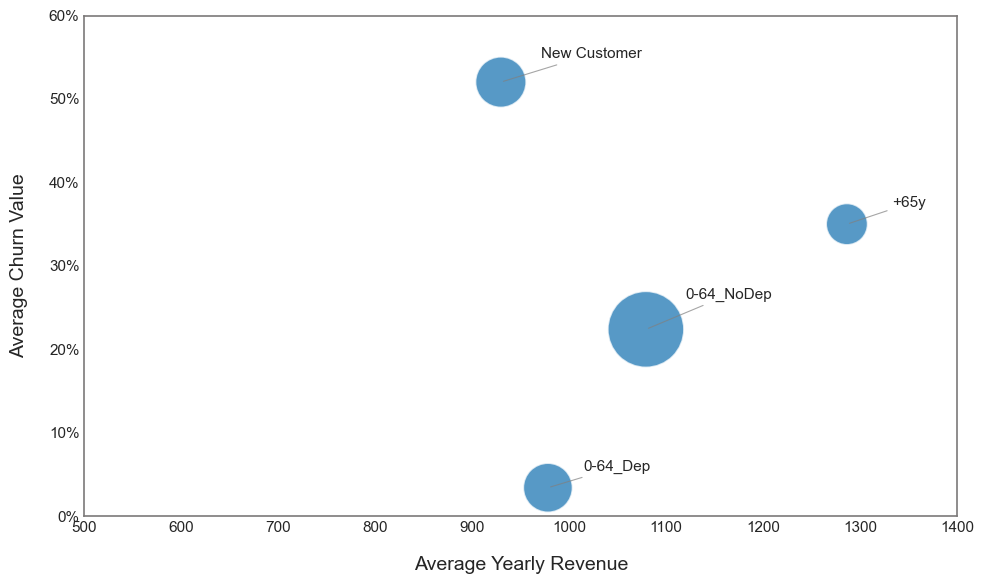

In [116]:
# Create scatter plot with bubbles representing segments leveraging segment_summary data
plt.style.use("seaborn-v0_8-white")
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    segment_summary["avg_yearly_revenue"],
    segment_summary["avg_churn_value"],
    s=(segment_summary["count"] / segment_summary["count"].max()) * 3000,
    alpha=0.75,
    edgecolor="white",
    linewidth=1.2
)
# --- Labels for each bubble ---
label_offsets = {
    "New Customer": (65, 15),
    "0-64_Dep": (50, 10),
    "0-64_NoDep": (60, 20),
    "+65y": (45, 10)
}
for _, row in segment_summary.iterrows():
    dx, dy = label_offsets.get(row["segment"], (0, 10))

    ax.annotate(
        row["segment"],
        xy=(row["avg_yearly_revenue"], row["avg_churn_value"]),
        xytext=(dx, dy),
        textcoords="offset points",
        fontsize=11,
        ha="center",
        va="bottom",
                arrowprops=dict(
            arrowstyle="-",    
            color="gray",
            lw=0.8,
            alpha=0.7
        )
    )
# --- Axes formatting ---
ax.set_xlabel("Average Yearly Revenue", fontsize=14, labelpad=15)
ax.set_ylabel("Average Churn Value", fontsize=14, labelpad=15)
ax.set_xlim(500,1400)
ax.set_ylim(0,0.6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.tick_params(axis="both", labelsize=11)
for spine in ax.spines.values():
    spine.set_color("#7c7979")
    spine.set_linewidth(1.2)


plt.tight_layout()
plt.show()

In [ ]:
# define a function that for a input df returns a df with an added 'segment' column
def assign_customer_segment(df):
    """
    Assign customer segments based on Age, Dependents, and Tenure in Months.
    Segments:
    - New Customers: Tenure in Months <= 6
    - +65y: Age 65-80 (regardless of Dependents)
    - 0-64_Dep: Age 0-64 with Dependents
    - 0-64_NoDep: Age 0-64 without Dependents
    """

    # 1) Create AgeGroup with the new bins
    bins   = [0, 65, 81]
    labels = ["0-64", "65-80"]

    df["AgeGroup"] = pd.cut(
        df["Age"],
        bins=bins,
        labels=labels,
        include_lowest=True,   
        right=False            # [0,35), [35,50), ...
    )

    # 2) Make Dependents a cleaner label
    df["DepFlag"] = df["Dependents"].map({"Yes": "Dep", "No": "NoDep"})

    # 3) Create the segment column: 5 age groups × 2 dep flags = 10 segments
    df["segment"] = df["AgeGroup"].astype(str) + "_" + df["DepFlag"]

    # 4) Override with "New Cust" segment when Tenure in Months <= 6
    mask_new = df["Tenure in Months"] <= 6
    df.loc[mask_new, "segment"] = "New Customer"

    # 5) Merge 65_80_Dep and 65_80_NoDep into '+65y'
    mask_senior = df["segment"].isin(["65-80_Dep", "65-80_NoDep"])
    df.loc[mask_senior, "segment"] = "+65y"

    # 6) Drop temporary columns
    df.drop(columns=["AgeGroup", "DepFlag"], inplace=True)

    return df